In [1]:
import pandas as pd
import numpy as np
import gzip
import json
import re
import os
import sys
import prince
import category_encoders as ce   # version 1.2.8
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
tags = pd.read_csv("tags-count-2col-all.dat",sep=' ', names=['tag', 'count'], header=None)


In [6]:
tags.head()


,tag,count
0,to-read,3
1,p,1
2,collection,1
3,w-c-fields,1
4,biography,1


In [15]:
#tags['sum_counts'] = tags.groupby(tags['tag']).transform('sum')
new = tags.groupby('tag')['count'].sum().reset_index(name ='Total Counts')

In [16]:
new.head()

,tag,Total Counts
0,-,2040
1,--,15
2,---,3
3,-----,2
4,---------novels,2


In [8]:
tags.head()

,tag,count,sum_counts
0,to-read,3,2.049567e+09
1,p,1,7.928000e+03
2,collection,1,6.777000e+04
3,w-c-fields,1,1.400000e+01
4,biography,1,2.782146e+06


In [17]:
sorted_tags = new.sort_values(by=['Total Counts'], ascending=False)

In [18]:
sorted_tags.head()

,tag,Total Counts
1149998,to-read,2049566994
338427,currently-reading,131995760
297120,classics,62273395
436355,favorites,61776179
444143,fiction,59841666


In [19]:
len(sorted_tags)

1300134

In [21]:
sorted_tags.to_csv('sorted_tags-all.csv')

In [23]:
sorted_tags.head(150)

,tag,Total Counts
1149998,to-read,2049566994
338427,currently-reading,131995760
297120,classics,62273395
436355,favorites,61776179
444143,fiction,59841666
428953,fantasy,35708932
854205,owned,18556035
221151,books-i-own,18507476
1265194,young-adult,17547421
982786,romance,14397702


In [24]:
sorted_tags[sorted_tags['tag'] == 'biography']

,tag,Total Counts
195664,biography,2782146


In [25]:
fiction = sorted_tags[sorted_tags['tag'].str.contains('fiction')]

,tag,Total Counts
444143,fiction,59841666
552752,historical-fiction,13414740
808395,non-fiction,12809945
1007326,science-fiction,9494218
812628,nonfiction,5512383
101831,adult-fiction,2629070
684037,literary-fiction,1578142
488521,general-fiction,1434103
955378,realistic-fiction,1164392
315326,contemporary-fiction,1126566


In [27]:
scifi = sorted_tags[sorted_tags['tag'].str.contains('sci')]
print(scifi)

                                         tag  Total Counts
1007326                      science-fiction       9494218
1005234                               sci-fi       7258443
1005607                       sci-fi-fantasy       2071556
1006596                              science       1783813
1009290                                scifi       1467044
430472                        fantasy-sci-fi       1012829
1009476                        scifi-fantasy        735315
1007489              science-fiction-fantasy        456653
430582                         fantasy-scifi        268210
1005367                   sci-fi-and-fantasy        181056
893429                     political-science         70833
896414                       popular-science         56684
1055525                       social-science         55372
430562               fantasy-science-fiction         55343
1007380          science-fiction-and-fantasy         44658
428549                          fantascienza         429

According to the count of tags, the six most populated genres which can be picked are:
classics (or classic), fantasy, romance, mystery, science-fiction (sci-fi or scifi)
and business, economics (for the scope of the project)

In [190]:
# get appropriate tags
def get_data_tags(inputdata, outputfile):
    wanted = ['classics', 'classic', 'fantasy', 'romance', 'mystery', 'science-fiction', 'sci-fi',
             'scifi', 'business', 'economics']

    output = open(outputfile, 'w')
    
    with open(inputdata) as json_file:
        for line in json_file:
                book = json.loads(line)
                names = [elm['name'] for elm in book['popular_shelves'] if \
            bool(re.match('[^\x00-\x7F\x80-\xFF\u0100-\u017F\u0180-\u024F\u1E00-\u1EFF]', elm['name'])) == False]
                if set(wanted).isdisjoint(names) == False:
                    output.write('{}\n'.format(json.dumps(book)))

    output.close()
    

In [191]:
get_data_tags('all-english-nochild-new.json', 'wanted_tagstmp.json')

In [3]:
# load data from json file (faster than pandas?)
def load_data(inputdata):
    books = []
    with open(inputdata) as json_file:
        for line in json_file:
            book = json.loads(line)
            books.append(book)
    return books

def get_data(inputdata):
    books = []
    with open(inputdata) as json_file:
        for lines in json_file:
            book = {}
            line = json.loads(lines)
            book['isbn'] = line['isbn']
            book['book_id'] = line['book_id']
            names = [elm['name'] for elm in line['popular_shelves']]
            counts = [elm['count'] for elm in line['popular_shelves']]
            book['popular_shelves'] = names
            book['count_shelves'] = counts
            book['average_rating'] = line['average_rating']
            book['title'] = line['title']
            books.append(book)
    return books

In [4]:
books = get_data('wanted_tagstmp.json')

In [5]:
len(books)

467054

In [48]:
len(books)

467054

In [195]:
books[0]

{'isbn': '',
 'book_id': '34883016',
 'popular_shelves': ['to-read',
  'ibooks',
  'favorite-authors',
  'may-2017-dr-reads',
  'sports-romance',
  'series-i-like',
  'romance',
  'favorites',
  'f-f',
  'hockey-romance',
  'ebook'],
 'count_shelves': ['4', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1'],
 'average_rating': '3.86',
 'title': 'Playmaker: A Venom Series Novella'}

In [147]:
def clean_data_language(inputdata, outputfile):
    eng_lan = ['en', 'enm', 'en-US', 'en-GB', '']
    child_books = ['child', 'children', 'children-s', 'childrens', 'kids-books', 'childrens-s-books']

    output = open(outputfile, 'a')
    books = []
    with open(inputdata) as json_file:
        for line in json_file:
            book = json.loads(line)
            names = [elm['name'] for elm in book['popular_shelves']]
            if (book['language_code'] in eng_lan) and (not set(child_books).isdisjoint(names[:6]) == False):
                output.write('{}\n'.format(json.dumps(book)))
                books.append(book)
    output.close()


In [6]:
test = pd.DataFrame(books)

In [7]:
test.head()

,average_rating,book_id,count_shelves,isbn,popular_shelves,title
0,3.86,34883016,"[4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",,"[to-read, ibooks, favorite-authors, may-2017-d...",Playmaker: A Venom Series Novella
1,3.93,6066814,"[159, 12, 11, 10, 7, 6, 5, 3, 3, 3, 3, 2, 2, 2...",184737297X,"[to-read, historical-fiction, mystery, histori...","Crowner Royal (Crowner John Mystery, #13)"
2,3.65,2008911,"[44, 7, 3, 3, 3, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1,...",0440083087,"[to-read, short-stories, fiction, french, fran...",Silken Eyes
3,3.48,7203847,"[7615, 1526, 1108, 866, 321, 317, 246, 245, 24...",0142427896,"[to-read, horror, stephen-king, fiction, curre...",The Tommyknockers
4,3.75,6158967,"[362, 25, 24, 10, 9, 8, 8, 7, 6, 4, 4, 3, 2, 2...",1400041694,"[to-read, currently-reading, non-fiction, soci...",Crude World: The Violent Twilight of Oil


In [119]:
#test.iloc[0].loc['popular_shelves']

In [8]:
# remove useless tags
def remove_nasty_tags(pops, cs):
    genreExceptions = [
    'to-read', 'currently-reading', 'owned', 'default', 'favorites', 'books-i-own',
    'ebook', 'kindle', 'library', 'audiobook', 'owned-books', 'audiobooks', 'my-books',
    'ebooks', 'to-buy', 'english', 'calibre', 'books', 'british', 'audio', 'my-library',
    'favourites', 're-read', 'general', 'e-books', 'ibooks', 'may-2017-dr-reads', 'favorite-authors',
    'series-i-like', 'ebook-unread', 'wishlist', 'did-not-finish', 'a-wishlist', 'wish-list',
    '-library-no-owned', '0-0-asap', '0-gu', '0-medieval-fiction', '0-owned', 'owned', '0-too-lazy-to-tag',
    'owned-tbr', 'wishlist', 'a-wishlist', 'did-not-finish'
    ]

    popnew = []
    cnew = []

    for elm, elmc in zip(pops, cs):    
        to_remove = []
        for i in range(len(elm)):
            if elm[i] in genreExceptions or (len(elm[i]) == 1) or \
            (bool(re.match('.*read*', elm[i])) == True) or (bool(re.match('.*kindle*', elm[i])) == True) \
            or (bool(re.match('.*year*', elm[i])) == True) or (bool(re.search(r'\d+', elm[i])) == True):
                to_remove.append(i) 
        popnew.append([elm[e] for e in range(len(elm)) if e not in to_remove][0:11])
        cnew.append([elmc[e] for e in range(len(elmc)) if e not in to_remove][0:11])
    
    return popnew, cnew




In [9]:
pops = test['popular_shelves']
cs = test['count_shelves']

popnew, cnew = remove_nasty_tags(pops, cs)

In [10]:
new_column_p = pd.Series(popnew, name='popular_shelves', index=range(len(popnew)))
new_column_c = pd.Series(cnew, name='count_shelves', index=range(len(cnew)))

test.update(new_column_p)
test.update(new_column_c)

In [11]:
test.head(10)

,average_rating,book_id,count_shelves,isbn,popular_shelves,title
0,3.86,34883016,"[1, 1, 1, 1]",,"[sports-romance, romance, f-f, hockey-romance]",Playmaker: A Venom Series Novella
1,3.93,6066814,"[12, 11, 10, 7, 6, 5, 3, 3, 3, 2, 2]",184737297X,"[historical-fiction, mystery, historical-myste...","Crowner Royal (Crowner John Mystery, #13)"
2,3.65,2008911,"[7, 3, 3, 3, 2, 2, 1, 1, 1, 1, 1]",0440083087,"[short-stories, fiction, french, français, lit...",Silken Eyes
3,3.48,7203847,"[1526, 1108, 866, 317, 240, 170, 160, 108, 99,...",0142427896,"[horror, stephen-king, fiction, sci-fi, scienc...",The Tommyknockers
4,3.75,6158967,"[24, 10, 9, 8, 8, 7, 6, 4, 3, 2, 2]",1400041694,"[non-fiction, society, politics, history, econ...",Crude World: The Violent Twilight of Oil
5,4.04,12182387,"[101, 59, 58, 55, 35, 26, 25, 19, 16, 16, 14]",,"[young-adult, ya, paranormal, fantasy, romance...","The Passion (Dark Visions, #3)"
6,3.98,12135833,"[5, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1]",1463650132,"[fiction, christian-fiction, christian, giveaw...",Holding On
7,4.23,29074693,"[14, 10, 10, 5, 5, 4, 4, 3, 3, 2, 2]",,"[paranormal, shifters, paranormal-romance, rom...","Prowled Darkness (Dante's Circle, #7)"
8,3.30,1902202,"[9, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1]",0854563903,"[mystery, england, mysteries, mood-comforting,...","Dead in the Morning (Patrick Grant, #1)"
9,4.12,25742454,"[2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",,"[graphic-novels, calibre-list, linseyschussan,...",The Switchblade Mamma


In [12]:
merde = test[test['isbn'] != '']

In [13]:
merde.head()

,average_rating,book_id,count_shelves,isbn,popular_shelves,title
1,3.93,6066814,"[12, 11, 10, 7, 6, 5, 3, 3, 3, 2, 2]",184737297X,"[historical-fiction, mystery, historical-myste...","Crowner Royal (Crowner John Mystery, #13)"
2,3.65,2008911,"[7, 3, 3, 3, 2, 2, 1, 1, 1, 1, 1]",0440083087,"[short-stories, fiction, french, français, lit...",Silken Eyes
3,3.48,7203847,"[1526, 1108, 866, 317, 240, 170, 160, 108, 99,...",0142427896,"[horror, stephen-king, fiction, sci-fi, scienc...",The Tommyknockers
4,3.75,6158967,"[24, 10, 9, 8, 8, 7, 6, 4, 3, 2, 2]",1400041694,"[non-fiction, society, politics, history, econ...",Crude World: The Violent Twilight of Oil
6,3.98,12135833,"[5, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1]",1463650132,"[fiction, christian-fiction, christian, giveaw...",Holding On


In [14]:
len(merde)

299499

In [16]:
data = pd.DataFrame(zip(merde['isbn'], merde['popular_shelves']), columns=['isbn', 'popular_shelves'])

In [17]:
data.head(10)

,isbn,popular_shelves
0,184737297X,"[historical-fiction, mystery, historical-myste..."
1,0440083087,"[short-stories, fiction, french, français, lit..."
2,0142427896,"[horror, stephen-king, fiction, sci-fi, scienc..."
3,1400041694,"[non-fiction, society, politics, history, econ..."
4,1463650132,"[fiction, christian-fiction, christian, giveaw..."
5,0854563903,"[mystery, england, mysteries, mood-comforting,..."
6,0743564421,"[classics, literature, classic, american-liter..."
7,1118727010,"[econimics-and-finance, business, poleco, beha..."
8,0698143760,"[fantasy, young-adult, ya, paranormal, series,..."
9,0752844458,"[mystery, crime, fiction, mysteries, cornwall,..."


In [18]:
# split shelves column
shelves = data['popular_shelves'].apply(pd.Series)

In [19]:
shelves.head()

,0,1,2,3,4,5,6,7,8,9,10
0,historical-fiction,mystery,historical-mystery,medieval,historical,crime,series,fiction,crowner-john,mystery-thrillers,england
1,short-stories,fiction,french,français,literature,france,litterature-francaise,written-in-french,collections,_le-livre-de-poche,short-fiction
2,horror,stephen-king,fiction,sci-fi,science-fiction,thriller,king,fantasy,aliens,supernatural,paranormal
3,non-fiction,society,politics,history,economics,nonfiction,energy,environment,current-affairs,environmental,oil
4,fiction,christian-fiction,christian,giveaways,shelfari-medical,shelfari-christian,going-home,wee-published,romance,miscellaneous,library-book


In [20]:
# merge columns with rest of the data
newdata = shelves.merge(data, right_index = True, left_index = True)

newdata.head()

,0,1,2,3,4,5,6,7,8,9,10,isbn,popular_shelves
0,historical-fiction,mystery,historical-mystery,medieval,historical,crime,series,fiction,crowner-john,mystery-thrillers,england,184737297X,"[historical-fiction, mystery, historical-myste..."
1,short-stories,fiction,french,français,literature,france,litterature-francaise,written-in-french,collections,_le-livre-de-poche,short-fiction,0440083087,"[short-stories, fiction, french, français, lit..."
2,horror,stephen-king,fiction,sci-fi,science-fiction,thriller,king,fantasy,aliens,supernatural,paranormal,0142427896,"[horror, stephen-king, fiction, sci-fi, scienc..."
3,non-fiction,society,politics,history,economics,nonfiction,energy,environment,current-affairs,environmental,oil,1400041694,"[non-fiction, society, politics, history, econ..."
4,fiction,christian-fiction,christian,giveaways,shelfari-medical,shelfari-christian,going-home,wee-published,romance,miscellaneous,library-book,1463650132,"[fiction, christian-fiction, christian, giveaw..."


In [21]:
# drop old popular shelves column
# transform the numeric columns into separate rows using the melt function
newdata1 = newdata.drop("popular_shelves", axis = 1)
newdata1.head()

,0,1,2,3,4,5,6,7,8,9,10,isbn
0,historical-fiction,mystery,historical-mystery,medieval,historical,crime,series,fiction,crowner-john,mystery-thrillers,england,184737297X
1,short-stories,fiction,french,français,literature,france,litterature-francaise,written-in-french,collections,_le-livre-de-poche,short-fiction,0440083087
2,horror,stephen-king,fiction,sci-fi,science-fiction,thriller,king,fantasy,aliens,supernatural,paranormal,0142427896
3,non-fiction,society,politics,history,economics,nonfiction,energy,environment,current-affairs,environmental,oil,1400041694
4,fiction,christian-fiction,christian,giveaways,shelfari-medical,shelfari-christian,going-home,wee-published,romance,miscellaneous,library-book,1463650132


In [211]:
newdata2 = newdata1.melt(id_vars = ['isbn'], value_name = "popular_shelve")
newdata2.head()

,isbn,variable,popular_shelve
0,184737297X,0,historical-fiction
1,0440083087,0,short-stories
2,0142427896,0,horror
3,1400041694,0,non-fiction
4,1463650132,0,fiction


In [212]:
newdata2.drop("variable", axis = 1, inplace = True)

In [213]:
newdata2.head()

,isbn,popular_shelve
0,184737297X,historical-fiction
1,0440083087,short-stories
2,0142427896,horror
3,1400041694,non-fiction
4,1463650132,fiction


In [214]:
newdata1.head()

,0,1,2,3,4,5,6,7,8,9,10,isbn
0,historical-fiction,mystery,historical-mystery,medieval,historical,crime,series,fiction,crowner-john,mystery-thrillers,england,184737297X
1,short-stories,fiction,french,français,literature,france,litterature-francaise,written-in-french,collections,_le-livre-de-poche,short-fiction,0440083087
2,horror,stephen-king,fiction,sci-fi,science-fiction,thriller,king,fantasy,aliens,supernatural,paranormal,0142427896
3,non-fiction,society,politics,history,economics,nonfiction,energy,environment,current-affairs,environmental,oil,1400041694
4,fiction,christian-fiction,christian,giveaways,shelfari-medical,shelfari-christian,going-home,wee-published,romance,miscellaneous,library-book,1463650132


In [22]:
newdata1.columns = ['tag1', 'tag2', 'tag3', 'tag4', 'tag5', 'tag6', 'tag7', 'tag8', 'tag9', 'tag10', 'tag11', 'isbn']

newdata1.head()


,tag1,tag2,tag3,tag4,tag5,tag6,tag7,tag8,tag9,tag10,tag11,isbn
0,historical-fiction,mystery,historical-mystery,medieval,historical,crime,series,fiction,crowner-john,mystery-thrillers,england,184737297X
1,short-stories,fiction,french,français,literature,france,litterature-francaise,written-in-french,collections,_le-livre-de-poche,short-fiction,0440083087
2,horror,stephen-king,fiction,sci-fi,science-fiction,thriller,king,fantasy,aliens,supernatural,paranormal,0142427896
3,non-fiction,society,politics,history,economics,nonfiction,energy,environment,current-affairs,environmental,oil,1400041694
4,fiction,christian-fiction,christian,giveaways,shelfari-medical,shelfari-christian,going-home,wee-published,romance,miscellaneous,library-book,1463650132


In [216]:
df_dum1 = pd.get_dummies(newdata1['tag1'])

In [220]:
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [225]:
ce.head()

,tag1,tag2,tag3,tag4,tag5,tag6,tag7,tag8,tag9,tag10,tag11,isbn
0,3065,mystery,historical-mystery,medieval,historical,crime,series,fiction,crowner-john,mystery-thrillers,england,184737297X
1,6514,fiction,french,français,literature,france,litterature-francaise,written-in-french,collections,_le-livre-de-poche,short-fiction,0440083087
2,3142,stephen-king,fiction,sci-fi,science-fiction,thriller,king,fantasy,aliens,supernatural,paranormal,0142427896
3,4892,society,politics,history,economics,nonfiction,energy,environment,current-affairs,environmental,oil,1400041694
4,2398,christian-fiction,christian,giveaways,shelfari-medical,shelfari-christian,going-home,wee-published,romance,miscellaneous,library-book,1463650132


In [238]:
count = 0
for i in newdata1['tag2']:
    #if type(i) != str or type(i) != int:
    #if len(str(i)) == 0:
    if type(i) == float:
        count += 1
        #print(i, type(i))
print(count)    
print(len(newdata1['tag2']))

605
299499


In [240]:
data_nonan = newdata1.dropna()

In [242]:
len(newdata1)

299499

In [243]:
len(data_nonan)

282095

In [252]:
ce_out = MultiColumnLabelEncoder(columns = ['tag1', 'tag2', 'tag3', 'tag4', 'tag5', 'tag6', 
                                        'tag7', 'tag8', 'tag9', 'tag10', 'tag11']).fit_transform(data_nonan)

In [259]:
ce_out.head()

,tag1,tag2,tag3,tag4,tag5,tag6,tag7,tag8,tag9,tag10,tag11,isbn
0,2020,6269,6292,11622,9914,5915,25648,10741,7907,23732,11404,184737297X
1,4131,3177,5249,6877,12918,9443,16645,34200,6847,89,33619,0440083087
2,2062,8998,4874,16489,19855,25974,15428,10321,1031,33881,28077,0142427896
3,3190,8786,11356,8294,6641,18268,8838,9675,8021,10965,26825,1400041694
4,1575,1740,2652,7409,20520,23463,11689,33381,28363,22512,20881,1463650132


In [267]:
ce_out[['tag1', 'tag2', 'tag3', 'tag4', 'tag5', 'tag6', 
    'tag7', 'tag8', 'tag9', 'tag10', 'tag11']] = ce_out[['tag1', 'tag2', 'tag3', 'tag4', 
                                                     'tag5', 'tag6', 'tag7', 'tag8', 'tag9', 'tag10', 'tag11']].apply(pd.to_numeric)

In [281]:
tmp = ce_out.iloc[:,0:4]
kmeans = KMeans(n_clusters=30)
kmeans.fit(tmp)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=30, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [282]:
centroids = kmeans.cluster_centers_


In [292]:
len(centroids)
centroids[1]

array([ 2872.47721823,  2981.21522782, 10482.10951239, 19701.01778577])

In [300]:
labels_in = ce_out.iloc[:, 11]
labels = kmeans.predict(tmp)

In [308]:
tmp.head()

,tag1,tag2,tag3,tag4
0,2020,6269,6292,11622
1,4131,3177,5249,6877
2,2062,8998,4874,16489
3,3190,8786,11356,8294
4,1575,1740,2652,7409


In [309]:
labels_in = ce_out.iloc[:, 11]

In [319]:
tmp = ce_out.iloc[:, [0, 1, 2, 3, 4, 11]]
tmp.head()

,tag1,tag2,tag3,tag4,tag5,isbn
0,2020,6269,6292,11622,9914,184737297X
1,4131,3177,5249,6877,12918,0440083087
2,2062,8998,4874,16489,19855,0142427896
3,3190,8786,11356,8294,6641,1400041694
4,1575,1740,2652,7409,20520,1463650132


In [321]:
features = ['tag1', 'tag2', 'tag3', 'tag4']
# Separating out the features
x = tmp.loc[:, features].values

# Separating out the target
y = tmp.loc[:,['isbn']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

In [322]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [323]:
finalDf = pd.concat([principalDf, tmp[['isbn']]], axis = 1)

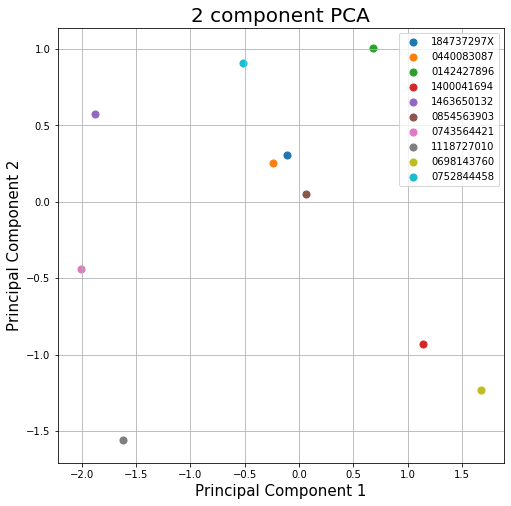

In [331]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = tmp['isbn'].tolist()

#colors = ['r', 'g', 'b']
for target in targets[:10]:
    indicesToKeep = finalDf['isbn'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               #, c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [326]:
len(targets)

282095

PCA is not giving much, books blue and orange are dissimilar.
Probably to conversion to numerical values did not work properly. Trying to find some other way on smaller table.

In [333]:
data = newdata1.dropna()

In [339]:
small = data.iloc[:10, [0, 1, 2, 3, 4, 11]]

In [338]:
#ce_out.iloc[:10, [0, 1, 2, 3, 4, 11]]  --> bad

In [340]:
small

,tag1,tag2,tag3,tag4,tag5,isbn
0,historical-fiction,mystery,historical-mystery,medieval,historical,184737297X
1,short-stories,fiction,french,français,literature,0440083087
2,horror,stephen-king,fiction,sci-fi,science-fiction,0142427896
3,non-fiction,society,politics,history,economics,1400041694
4,fiction,christian-fiction,christian,giveaways,shelfari-medical,1463650132
5,mystery,england,mysteries,mood-comforting,milieu-small-town,0854563903
6,classics,literature,classic,american-literature,rory-gilmore-challenge,0743564421
7,econimics-and-finance,business,poleco,behaviour-science,risk-management,1118727010
8,fantasy,young-adult,ya,paranormal,series,0698143760
9,mystery,crime,fiction,mysteries,cornwall,0752844458


In [356]:
alltags = pd.unique(small.iloc[:, 0:5].values.ravel('K'))

In [ ]:
tagtest = ['fiction']